# ASTR 5490: Homework 2 (Time-Domain Astronomy / Fourier Transforms)

## 1) Experimenting with Fourier Components
## $S(t) = C_0 + C_1\cos\left(1\frac{2\pi(t-t_0)}{P}\right) + C_2\cos\left(2\frac{2\pi(t-t_0)}{P}\right) + C_3\cos\left(3\frac{2\pi(t-t_0)}{P}\right) + ...$

In [60]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.timeseries import LombScargle

In [2]:
# Class to calculate Fourier components
class Fourier:
    
    # Initialize the instance of this Class with the following properties
    def __init__(self,c,start,end,period=1.0,t0=0.0,parity='both'):
        # Inputs
        #    c: list of coefficients in front of Fourier components
        #    period: period of signal (default is 1)
        #    t0: reference time for signal (default is 0)
        
        # Define list of coefficients
        self.c = c
        
        # Define parity
        self.parity = parity
        
        # Calculate renormalization factor
        self.R = np.sum(c)
        
        # Define period and reference time
        self.period = period
        self.t0 = t0
        
        # Make a list of times to evaluate signal at (2 periods)
        self.t = np.linspace(start*period,end*period,100)
        
        # Calculate phase of Fourier components
        self.phase = [(t-self.t0)/self.period for t in self.t]

    # Function to calcuate signal vs. time
    def FourierSignal(self):
        
        # Define empty list of signal amplitude values
        S = []
        
        # Define multiple within cosine argument depending on which terms you're interested in
        if self.parity == 'even':
            
            # Makes evenly spaced list of even numbers
            multiples = np.arange(2,2*len(c),2)      
                
        elif self.parity == 'odd':
            
            # Makes evenly spaced list of odd numbers
            multiples = np.arange(1,2*len(c)+1,2)
            
        elif self.parity == 'both':
            
            # Make list of numbers from 0 to length of coefficient list
            multiples = np.arange(1,len(c),1)
            
        # Calculate signal value for each phase value
        for phi in self.phase:
            
            # Define C_0 as first term (assumed to be first term of user-entered coefficient array)
            terms = self.c[0]
            
            # Add all Fourier terms you're interested in
            for i in range(1,len(c)):
                terms += self.c[i]*np.cos(multiples[i-1]*2*np.pi*phi)
                
            # Append normalized signal value to signal array
            S.append(1/self.R*terms)

        return(self.c,self.phase,self.t,S)
    
    # Function to plot signal vs. time
    def FourierPlotter(self,xaxis,linestyle='solid',legend=True):
        
        c,phi,t,S = self.FourierSignal()
        
        # Plot signal vs. time
        ax = plt.subplot(111)
        
        # Plot S vs. t
        label = r'First {0} {1} coeff.'.format(len(c),self.parity)
        
        if xaxis == 'phase':
            ax.plot(phi,S,label=label,linestyle=linestyle)
            ax.set_xlabel('Phase',fontsize=14)
        elif xaxis == 'time':
            ax.plot(t,S,label=label,linestyle=linestyle)
            ax.set_xlabel('Time (period)',fontsize=14)

        # Add plot labels
        ax.axhline(0,color='black',linestyle='dashed')
        
        ax.set_ylabel('S(t)',fontsize=14)
        
        if legend == True:
            ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=12)
            
        ax.set_title('Signal vs. Time',fontsize=18)

In [3]:
# Make list of linestyles
linsty = ['solid','dashed','dotted','dashdot']

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

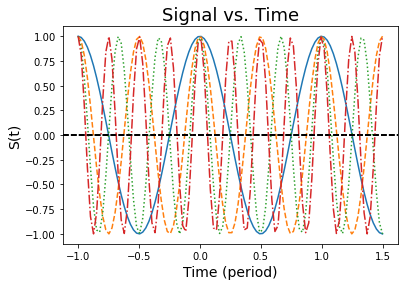

In [4]:
# Make a list of Fourier coefficients so they're all 0
c = np.zeros(5)

# Loop over each coefficient
for i in range(1,len(c)):
    
    # Set different cofficient equal to 1
    c[i] = 1

    # Create instance of class for this set of coefficients and plot form of Fourier component
    fourier = Fourier(c,start=-1,end=1.5)
    fourier.FourierPlotter(xaxis='time',linestyle=linsty[i-1],legend=False)
    
    # Reset particular coefficient to 1 for next loop
    c[i] = 0

## 1a) Let $C_1=C_2=1$ and $C_{>2}=0$

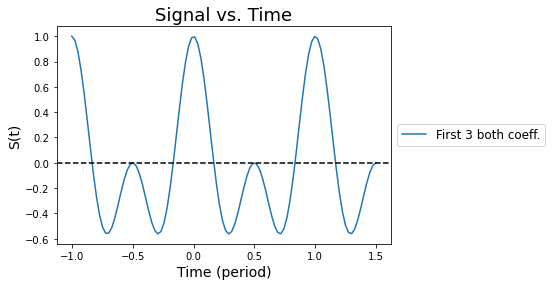

In [5]:
# Make a list of Fourier coefficients
c = [0,1,1]

# Create instance of class for this set of coefficients 
fourierOddEven = Fourier(c,start=-1,end=1.5)

# Plot form of Fourier components
fourierOddEven.FourierPlotter(xaxis='time')

### If we compare the graph from 1a to the graph with $C_1$ through $C_4$, we see that adding the first odd and even components reduces the amplitude of the even peaks (second, fourth, part of sixth) where the individual functions have opposing maxima/minima. The odd peaks (first, third, fifth) remain the same since they share a maxima there.

## 1b) First four even components with equal power

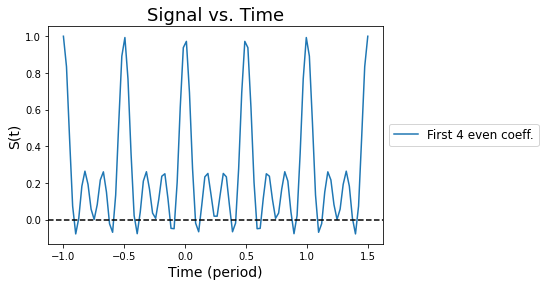

In [6]:
# Make a list of Fourier coefficients of equal power
c = np.ones(4)

# Create instance of class for set first four even coefficients 
fourierEven = Fourier(c,start=-1,end=1.5,parity='even')

# Plot form of Fourier components
fourierEven.FourierPlotter(xaxis='time')

## 1b) Adding increasingly more even components with equal power

In [7]:
# Define array with different numbers of coefficients
numComponents = [10,20]

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


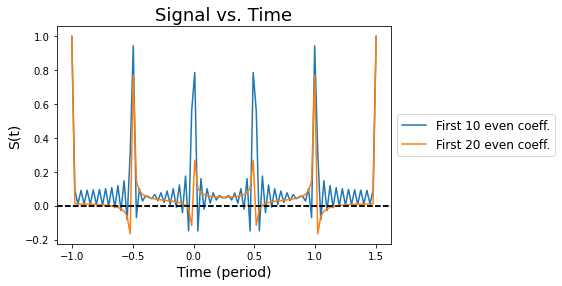

In [8]:
# Plot Fourier series with different numbers of terms
for num in numComponents:
    
    # Make list of ones
    c = np.ones(num)
    
    # Create instance of Fourier class and plot Fourier series
    instance = Fourier(c,start=-1,end=1.5,parity='even')
    instance.FourierPlotter(xaxis='time')

### Adding increasingly more even components with equal power decreases the amplitude of all the oscillations and makes the oscillations narrower

## 1c) First four even components with successive components at half power

In [9]:
# Function to make a list of a descending geometric series
def DescendingGeometric(length):
    
    # Make list of coefficients that are all 1
    c = np.ones(length)
    
    # Multiply each component by another factor of 1/2
    for i in range(1,len(c)):
        c[i] *= .5/i
        
    return(c)

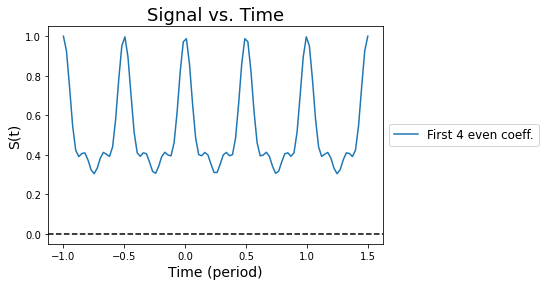

In [10]:
# Make a list of first four even Fourier coefficients with successively half-powers
c = DescendingGeometric(4)
    
# Create instance of class for set of first 4 even coefficients 
fourierGeometric = Fourier(c,start=-1,end=1.5,parity = 'even')

# Plot form of Fourier components
fourierGeometric.FourierPlotter(xaxis='time')

## 1b) Adding increasingly more even components with half power

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


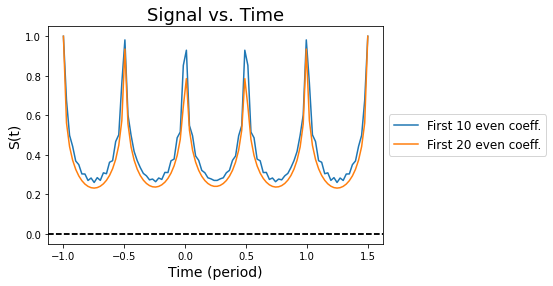

In [11]:
# Plot Fourier series with different numbers of terms
for num in numComponents:
    
    # Make a list of even Fourier coefficients with successively half-powers
    c = DescendingGeometric(num)
    
    # Create instance of Fourier class and plot Fourier series
    instance = Fourier(c,start=-1,end=1.5,parity='even')
    instance.FourierPlotter(xaxis='time')

### Adding more components smooths this function out and makes the peaks narrower. Another demonstration of how adding more Fourier components produced a smoother wave.

## 1d) First Four Odd Terms with Equal Power

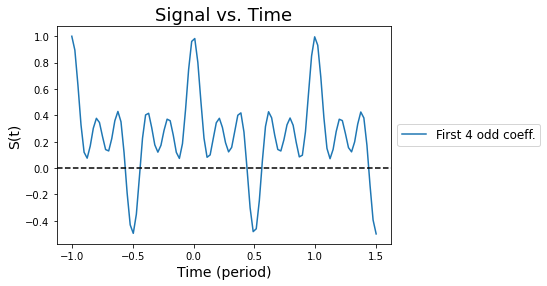

In [12]:
# Make a list of Fourier coefficients of equal power
c = np.ones(4)

# Create instance of class for set first four odd coefficients 
fourierEven = Fourier(c,start=-1,end=1.5,parity='odd')

# Plot form of Fourier components
fourierEven.FourierPlotter(xaxis='time')

## 1d) Adding increasingly more odd components with half power

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


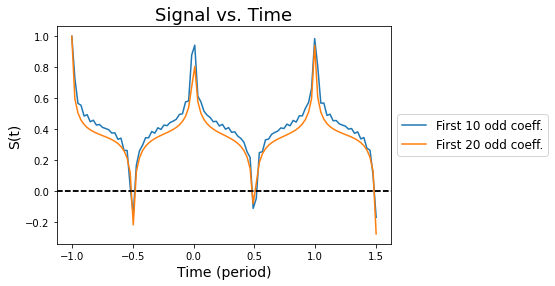

In [13]:
# Plot Fourier series with different numbers of terms
for num in numComponents:
    
    # Make a list of even Fourier coefficients with successively half-powers
    c = DescendingGeometric(num)
    
    # Create instance of Fourier class and plot Fourier series
    instance = Fourier(c,start=-1,end=1.5,parity='odd')
    instance.FourierPlotter(xaxis='time')

## 1e) Qualitatively Reproducing Astronomical Periodic Phenomena

### Light curve of a contact binary star

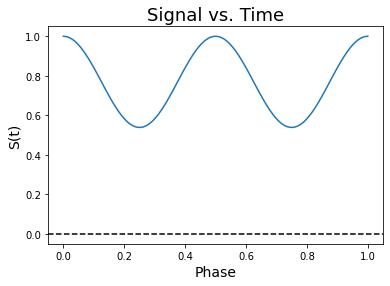

In [14]:
c = [1,0,.3]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Velocity curve of a planet in an e=0 orbit

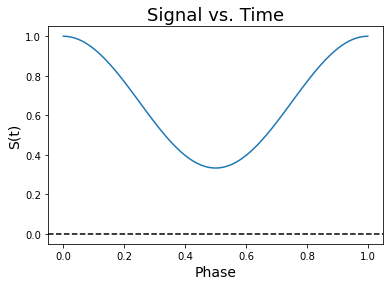

In [15]:
c = [1,.5]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Velocity curve of a planet in an e>>0 orbit

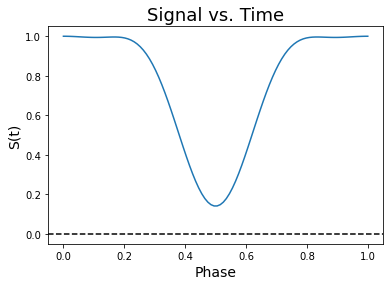

In [16]:
c = [2,1,-.5,.13]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Light curve of an eclipsing binary star system with two stars of same temp.

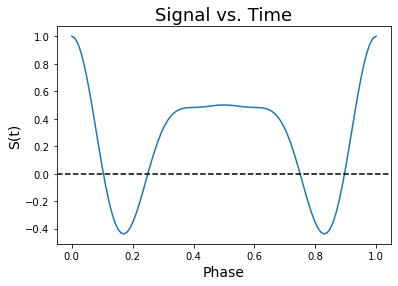

In [17]:
c = [2,-1,3,3,1]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Light curve of a planet transit (top hat)

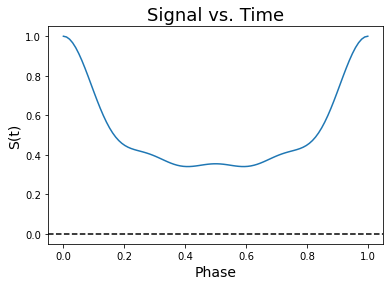

In [18]:
c = [2,1,.5,.25,.125]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

## 1f) Plotting Cn vs n for transiting planet profile

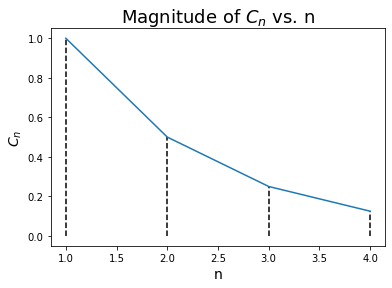

In [19]:
# Plotting Cn vs n
n = [1,2,3,4]
plt.plot(n,c[1:5])
plt.title(r'Magnitude of $C_n$ vs. n',fontsize=18)
plt.xlabel('n',fontsize=14)
plt.ylabel(r'$C_n$',fontsize=14)
for value in n:
    plt.vlines(value,0,c[value],linestyle='dashed')

### Light curve of a pulsating star

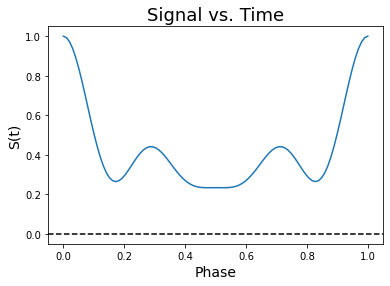

In [20]:
c = [2,1,.5,.8,.4]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

## 2) Real Contact Binary Star Light Curve

## 2a) Flux vs. Date

Text(0.5, 1.0, 'Flux vs. Time for KIC02141697')

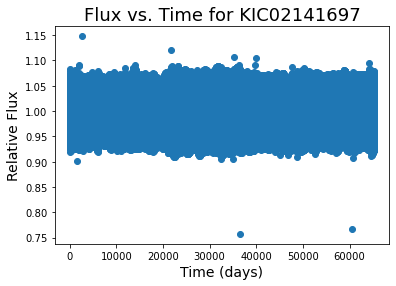

In [69]:
# Read in data file
ContactBinary = np.genfromtxt('KIC02141697_LC_all.dat',names=True)

# Convert Julian dates to days
times = np.linspace(0,len(ContactBinary['JD']),len(ContactBinary['JD']))

# Plot Flux vs. day
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(times,ContactBinary['RelFlux'])
ax.set_xlabel('Time (days)',fontsize=14)
ax.set_ylabel('Relative Flux',fontsize=14)
ax.set_title('Flux vs. Time for KIC02141697',fontsize=18)

## 2b) Make Power Spectrum with astropy.timeseries.LombScargle for entire Kepler Quarter 2 dataset

In [68]:
frequency = np.linspace(minfreq,maxfreq,numIntervals)

NameError: name 'minfreq' is not defined